## Customer Segmentation Analysis / Market Basket Analysis
## Berenice Morales Silva


Importación de fuente y limpieza de datos

In [2]:
# Identificar la codificación que tiene el archivo
import chardet

archivo = '/content/sample_data/Capstone1C_EuroMart Stores-1.csv'

with open(archivo, 'rb') as file:
    resultado = chardet.detect(file.read())

print(f"Encoding: {resultado['encoding']} con nivel de confianza: {resultado['confidence']:.2f}")

Encoding: ISO-8859-1 con nivel de confianza: 0.73


In [2]:
import pandas as pd

In [3]:
df_transacciones = pd.read_csv('/content/sample_data/Capstone1C_EuroMart Stores-1.csv', encoding='ISO-8859-1')

In [4]:
df_transacciones.head()

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?
0,BN-2011-7407039,1/1/2011,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",$0.5,$45,$-26,3,False
1,AZ-2011-9050313,1/3/2011,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",$-,$854,$290,7,True
2,AZ-2011-6674300,1/4/2011,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",$-,$140,$21,3,True
3,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Art,"Boston Markers, Easy-Erase",$0.5,$27,$-22,2,True
4,BN-2011-2819714,1/4/2011,Mary Parker,United Kingdom,England,Birmingham,North,Corporate,Economy,Office Supplies,Storage,"Eldon Folders, Single Width",$0.5,$17,$-1,2,True


In [5]:
df_transacciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8047 entries, 0 to 8046
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order ID       8047 non-null   object
 1   Order Date     8047 non-null   object
 2   Customer Name  8047 non-null   object
 3   Country        8047 non-null   object
 4   State          8047 non-null   object
 5   City           8047 non-null   object
 6   Region         8047 non-null   object
 7   Segment        8047 non-null   object
 8   Ship Mode      8047 non-null   object
 9   Category       8047 non-null   object
 10  Sub-Category   8047 non-null   object
 11  Product Name   8047 non-null   object
 12   Discount      8047 non-null   object
 13   Sales         8047 non-null   object
 14   Profit        8047 non-null   object
 15  Quantity       8047 non-null   int64 
 16  Feedback?      8047 non-null   bool  
dtypes: bool(1), int64(1), object(15)
memory usage: 1013.9+ KB


In [6]:
# Hay 3 columnas con espacios en el nombre, eliminé los espacios
df_transacciones.columns = df_transacciones.columns.str.strip()

In [7]:
# Separé el campo de producto en dos, ya que tiene el nombre del producto y más detalle después de la coma
# Esto es importante para el análisis de market-basket
df_transacciones[['Product', 'Attribute']] = df_transacciones['Product Name'].str.split(', ', expand=True)

In [8]:
df_transacciones.head(3)

,Order ID,Order Date,Customer Name,Country,State,City,Region,Segment,Ship Mode,Category,Sub-Category,Product Name,Discount,Sales,Profit,Quantity,Feedback?,Product,Attribute
0,BN-2011-7407039,1/1/2011,Ruby Patel,Sweden,Stockholm,Stockholm,North,Home Office,Economy Plus,Office Supplies,Paper,"Enermax Note Cards, Premium",$0.5,$45,$-26,3,False,Enermax Note Cards,Premium
1,AZ-2011-9050313,1/3/2011,Summer Hayward,United Kingdom,England,Southport,North,Consumer,Economy,Furniture,Bookcases,"Dania Corner Shelving, Traditional",$-,$854,$290,7,True,Dania Corner Shelving,Traditional
2,AZ-2011-6674300,1/4/2011,Devin Huddleston,France,Auvergne-Rhône-Alpes,Valence,Central,Consumer,Economy,Office Supplies,Art,"Binney & Smith Sketch Pad, Easy-Erase",$-,$140,$21,3,True,Binney & Smith Sketch Pad,Easy-Erase


In [9]:
# En las siguientes líneas eliminé caracteres de las columnas numéricas para poder convertir a float
df_transacciones['Discount'] = df_transacciones['Discount'].str.replace('$- ','0', regex = False)
df_transacciones['Sales'] = df_transacciones['Sales'].str.replace('$- ','0', regex = False)
df_transacciones['Profit'] = df_transacciones['Profit'].str.replace('$- ','0', regex = False)

In [10]:
df_transacciones['Discount'] = df_transacciones['Discount'].str.replace('$','', regex = False)
df_transacciones['Sales'] = df_transacciones['Sales'].str.replace('$','', regex = False)
df_transacciones['Profit'] = df_transacciones['Profit'].str.replace('$','', regex = False)

In [11]:
df_transacciones['Discount'] = df_transacciones['Discount'].str.replace(',','', regex = False)
df_transacciones['Sales'] = df_transacciones['Sales'].str.replace(',','', regex = False)
df_transacciones['Profit'] = df_transacciones['Profit'].str.replace(',','', regex = False)

In [12]:
df_transacciones['Discount'] = df_transacciones['Discount'].str.replace(' ','', regex = False)
df_transacciones['Sales'] = df_transacciones['Sales'].str.replace(' ','', regex = False)
df_transacciones['Profit'] = df_transacciones['Profit'].str.replace(' ','', regex = False)

In [13]:
df_transacciones['Order Date'] = pd.to_datetime(df_transacciones['Order Date'], format='%m/%d/%Y')

In [14]:
df_transacciones['Discount'] = df_transacciones['Discount'].astype(float)
df_transacciones['Sales'] = df_transacciones['Sales'].astype(float)
df_transacciones['Profit'] = df_transacciones['Profit'].astype(float)

In [15]:
# Verifiqué que las órdenes sean identificadores únicos por cliente
ordenes_unicas = df_transacciones.groupby('Order ID').agg({'Customer Name': 'nunique'})

In [16]:
ordenes_unicas = ordenes_unicas['Customer Name'] > 1
ordenes_unicas.unique()

array([False])

In [17]:
# Generé una nueva columna con un id numérico
d_id = {}
id_num = 1
ids = []

for i in df_transacciones['Customer Name']:
    if i not in d_id:
        d_id[i] = id_num
        id_num += 1
    ids.append(d_id[i])

df_transacciones['ID_Customer'] = ids

In [18]:
ids_unicos = df_transacciones.groupby('Customer Name').agg({'ID_Customer': 'nunique'})

In [19]:
ids_unicos = ids_unicos['ID_Customer'] > 1

In [20]:
ids_unicos.unique()

array([False])

In [21]:
lista_clientes_ids = df_transacciones[['ID_Customer', 'Customer Name']].drop_duplicates()
display(lista_clientes_ids)

,ID_Customer,Customer Name
0,1,Ruby Patel
1,2,Summer Hayward
2,3,Devin Huddleston
3,4,Mary Parker
5,5,Daniel Burke
...,...,...
6905,788,Bethany Powell
6989,789,Alexandra Mahmood
7134,790,Carol Leach
7337,791,Charles Rice


In [22]:
df_transacciones.describe()

,Discount,Sales,Profit,Quantity,ID_Customer
count,8047.000000,8047.000000,8047.000000,8047.000000,8047.000000
mean,0.112166,291.845657,35.198211,3.772089,362.288430
std,0.183050,485.212156,178.125844,2.203369,217.905369
min,0.000000,3.000000,-3060.000000,1.000000,1.000000
25%,0.000000,48.000000,1.000000,2.000000,173.000000
50%,0.000000,117.000000,14.000000,3.000000,354.000000
75%,0.100000,313.000000,47.000000,5.000000,549.000000
max,0.900000,6517.000000,2476.000000,14.000000,792.000000


## Análisis RFM

In [23]:
df_transacciones_rfm1 = df_transacciones.groupby(['ID_Customer','Customer Name','Order Date']).agg({'Order ID': 'count', 'Sales': 'sum'}).reset_index()
df_transacciones_rfm1 = df_transacciones_rfm1.rename(columns={'Order ID': 'Ordenes'})
display(df_transacciones_rfm1)

,ID_Customer,Customer Name,Order Date,Ordenes,Sales
0,1,Ruby Patel,2011-01-01,1,45.0
1,1,Ruby Patel,2011-06-14,1,241.0
2,1,Ruby Patel,2012-04-27,2,73.0
3,1,Ruby Patel,2012-08-30,1,153.0
4,1,Ruby Patel,2013-09-09,2,178.0
...,...,...,...,...,...
4096,789,Alexandra Mahmood,2014-09-04,1,47.0
4097,790,Carol Leach,2014-09-16,1,1716.0
4098,790,Carol Leach,2014-11-15,1,47.0
4099,791,Charles Rice,2014-10-20,2,642.0


In [24]:
current_date = df_transacciones_rfm1['Order Date'].max()  # Get the latest date in the dataset
df_transacciones_rfm1['Recencia'] = (current_date - df_transacciones_rfm1['Order Date']).dt.days
df_transacciones_rfm1['Frecuencia'] = df_transacciones_rfm1['Ordenes']
df_transacciones_rfm1['ValorM'] = df_transacciones_rfm1['Sales']

In [25]:
df_transacciones_rfm1

,ID_Customer,Customer Name,Order Date,Ordenes,Sales,Recencia,Frecuencia,ValorM
0,1,Ruby Patel,2011-01-01,1,45.0,1460,1,45.0
1,1,Ruby Patel,2011-06-14,1,241.0,1296,1,241.0
2,1,Ruby Patel,2012-04-27,2,73.0,978,2,73.0
3,1,Ruby Patel,2012-08-30,1,153.0,853,1,153.0
4,1,Ruby Patel,2013-09-09,2,178.0,478,2,178.0
...,...,...,...,...,...,...,...,...
4096,789,Alexandra Mahmood,2014-09-04,1,47.0,118,1,47.0
4097,790,Carol Leach,2014-09-16,1,1716.0,106,1,1716.0
4098,790,Carol Leach,2014-11-15,1,47.0,46,1,47.0
4099,791,Charles Rice,2014-10-20,2,642.0,72,2,642.0


In [26]:
df_transacciones_rfm1.describe()

,ID_Customer,Ordenes,Sales,Recencia,Frecuencia,ValorM
count,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000,4101.000000
mean,362.318459,1.962204,572.660814,623.538161,1.962204,572.660814
std,218.064526,1.376204,794.795209,413.177417,1.376204,794.795209
min,1.000000,1.000000,3.000000,0.000000,1.000000,3.000000
25%,171.000000,1.000000,94.000000,251.000000,1.000000,94.000000
50%,353.000000,1.000000,263.000000,572.000000,1.000000,263.000000
75%,546.000000,2.000000,740.000000,943.000000,2.000000,740.000000
max,792.000000,11.000000,7630.000000,1460.000000,11.000000,7630.000000


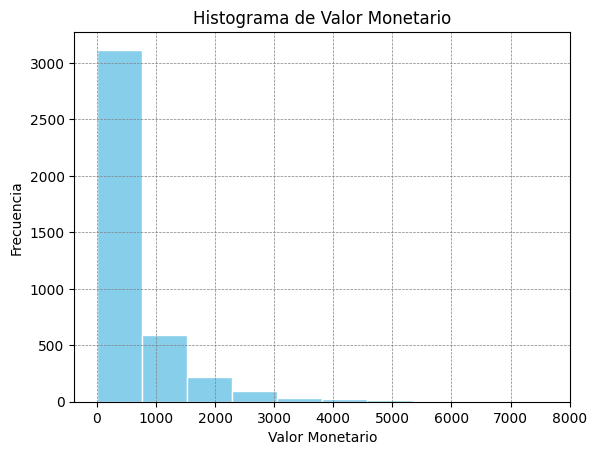

In [27]:
import matplotlib.pyplot as plt
plt.hist(df_transacciones_rfm1['ValorM'], bins=10, edgecolor='white', color='skyblue')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Valor Monetario')
plt.ylabel('Frecuencia')
plt.title('Histograma de Valor Monetario')
plt.show()

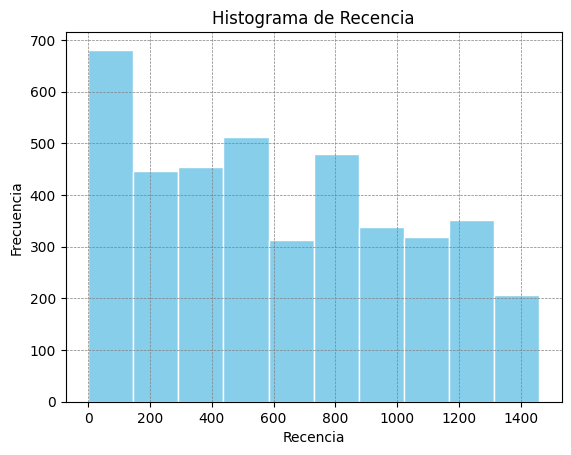

In [28]:
plt.hist(df_transacciones_rfm1['Recencia'], bins=10, edgecolor='white',color='skyblue')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')
plt.title('Histograma de Recencia')
plt.show()

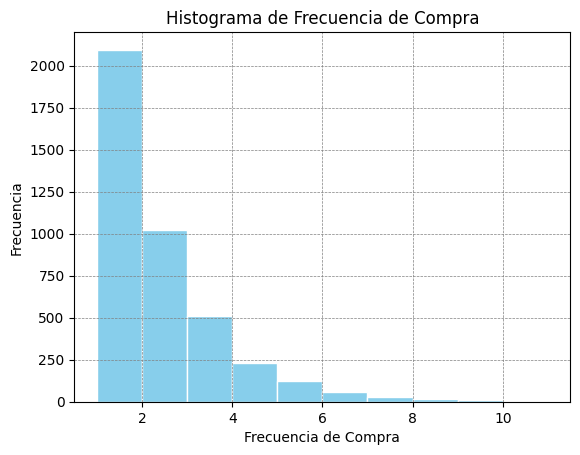

In [29]:
import matplotlib.pyplot as plt
plt.hist(df_transacciones_rfm1['Frecuencia'], bins=10, edgecolor='white',color='skyblue')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Frecuencia de Compra')
plt.ylabel('Frecuencia')
plt.title('Histograma de Frecuencia de Compra')
plt.show()

In [30]:
# Puntuación RFM
rfm_puntos = df_transacciones_rfm1.groupby(['ID_Customer','Customer Name']).agg({'Recencia': 'min','Frecuencia': 'sum','ValorM': 'sum'}).reset_index()

In [31]:
rfm_puntos

,ID_Customer,Customer Name,Recencia,Frecuencia,ValorM
0,1,Ruby Patel,478,7,690.0
1,2,Summer Hayward,190,21,6120.0
2,3,Devin Huddleston,131,7,1435.0
3,4,Mary Parker,65,16,3599.0
4,5,Daniel Burke,117,15,1448.0
...,...,...,...,...,...
787,788,Bethany Powell,125,1,57.0
788,789,Alexandra Mahmood,118,1,47.0
789,790,Carol Leach,46,2,1763.0
790,791,Charles Rice,72,2,642.0


In [32]:
rfm_puntos['R'] = pd.qcut(rfm_puntos['Recencia'], q=4, labels=list(range(4, 0, -1)))
rfm_puntos['F'] = pd.qcut(rfm_puntos['Frecuencia'], q=4, labels=list(range(1, 5)))
rfm_puntos['M'] = pd.qcut(rfm_puntos['ValorM'], q=4, labels=list(range(1, 5)))

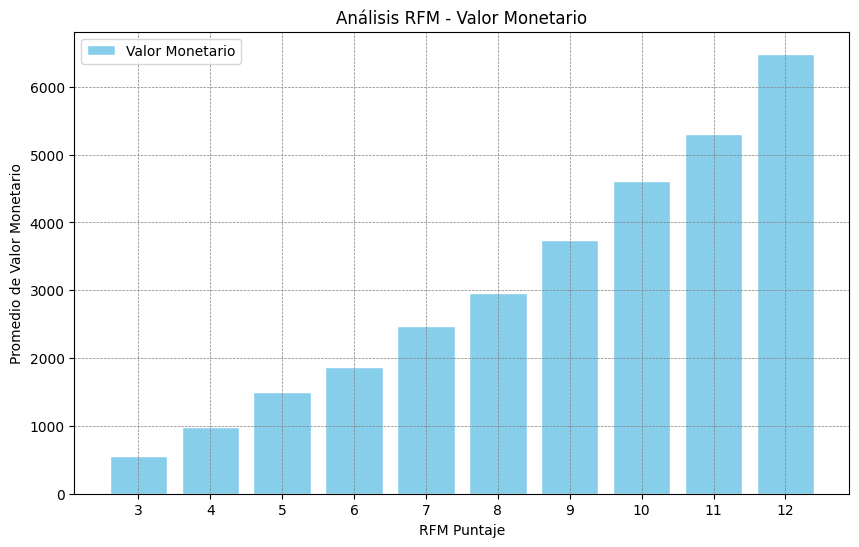

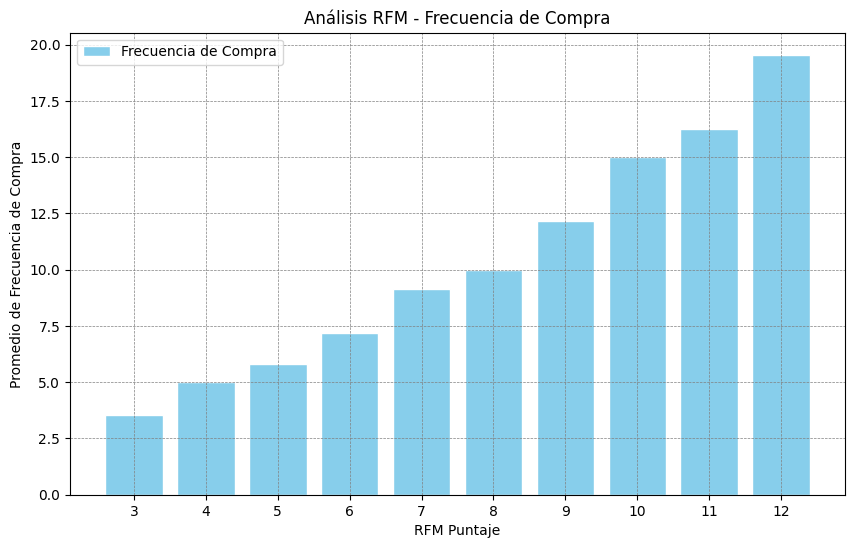

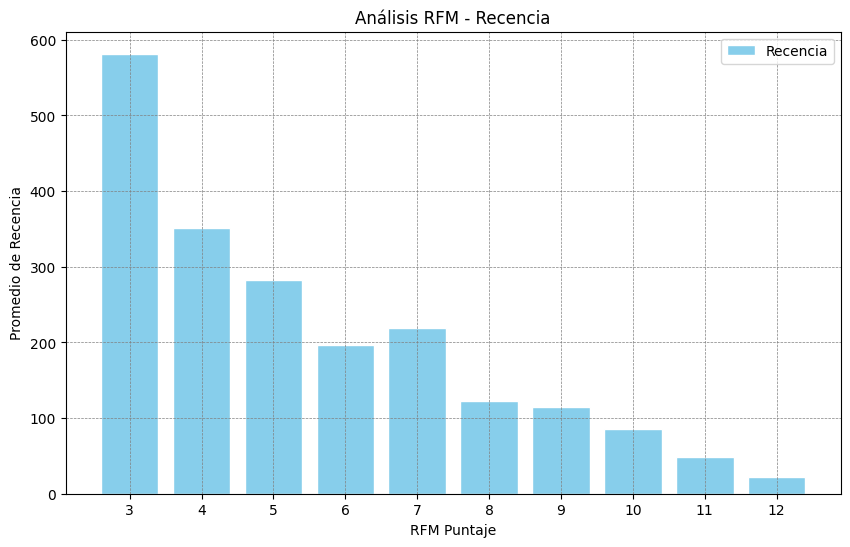

In [33]:
rfm_puntos['RFM_Puntos'] = rfm_puntos[['R', 'F', 'M']].sum(axis=1)
rfm_segmento = rfm_puntos.groupby('RFM_Puntos').agg({
    'ValorM': 'mean',
    'Frecuencia': 'mean',
    'Recencia': 'mean'
})

plt.figure(figsize=(10, 6))
plt.title('Análisis RFM - Valor Monetario')
plt.xlabel('RFM Puntaje')
plt.ylabel('Promedio de Valor Monetario')
plt.bar(rfm_segmento.index.astype(str), rfm_segmento['ValorM'], label='Valor Monetario',edgecolor='white',color='skyblue')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
#plt.bar(rfm_segmento.index.astype(str), rfm_segmento['Frecuencia'], label='Frequency')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Análisis RFM - Frecuencia de Compra')
plt.xlabel('RFM Puntaje')
plt.ylabel('Promedio de Frecuencia de Compra')
plt.bar(rfm_segmento.index.astype(str), rfm_segmento['Frecuencia'], label='Frecuencia de Compra',edgecolor='white',color='skyblue')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.title('Análisis RFM - Recencia')
plt.xlabel('RFM Puntaje')
plt.ylabel('Promedio de Recencia')
plt.bar(rfm_segmento.index.astype(str), rfm_segmento['Recencia'], label='Recencia',edgecolor='white',color='skyblue')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()



In [34]:
display(rfm_puntos)

,ID_Customer,Customer Name,Recencia,Frecuencia,ValorM,R,F,M,RFM_Puntos
0,1,Ruby Patel,478,7,690.0,1,2,1,4
1,2,Summer Hayward,190,21,6120.0,2,4,4,10
2,3,Devin Huddleston,131,7,1435.0,2,2,2,6
3,4,Mary Parker,65,16,3599.0,3,4,3,10
4,5,Daniel Burke,117,15,1448.0,3,4,2,9
...,...,...,...,...,...,...,...,...,...
787,788,Bethany Powell,125,1,57.0,2,1,1,4
788,789,Alexandra Mahmood,118,1,47.0,3,1,1,5
789,790,Carol Leach,46,2,1763.0,3,1,2,6
790,791,Charles Rice,72,2,642.0,3,1,1,5


In [35]:
display(rfm_segmento)

,ValorM,Frecuencia,Recencia
RFM_Puntos,,,
3,553.693548,3.532258,581.532258
4,985.959459,5.000000,350.932432
5,1493.311688,5.805195,282.636364
6,1868.753247,7.207792,196.844156
7,2474.095745,9.138298,219.361702
8,2966.510204,9.989796,122.714286
9,3739.531532,12.153153,114.918919
10,4606.150538,15.021505,84.978495
11,5304.377049,16.262295,48.606557


## Algoritmos de aprendizaje de máquina no supervisado

## K-means

In [36]:
from sklearn.cluster import KMeans
from  numpy.linalg import norm
from sklearn.preprocessing import normalize

In [37]:
rfm_df2 = rfm_puntos[["Recencia","Frecuencia","ValorM"]]

In [38]:
# Hay que normalizar los datos
from  numpy.linalg import norm
from sklearn.preprocessing import normalize
data_norm = normalize(rfm_df2)
data_norm = pd.DataFrame(data_norm, columns=rfm_df2.columns)
data_norm.head(5)

,Recencia,Frecuencia,ValorM
0,0.569438,0.008339,0.821992
1,0.031031,0.003430,0.999513
2,0.090910,0.004858,0.995847
3,0.018057,0.004445,0.999827
4,0.080534,0.010325,0.996698


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

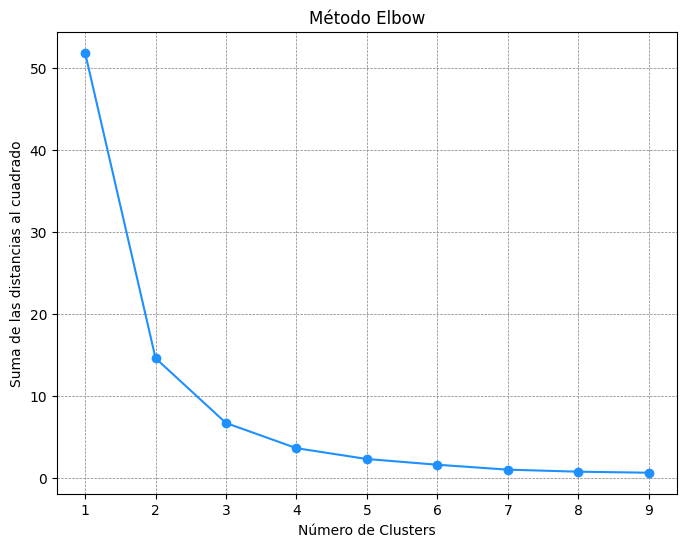

In [39]:
k_values = range(1, 10)

wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_values, wcss, marker='o',color='dodgerblue')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Suma de las distancias al cuadrado')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


In [40]:
# Creación del objeto
km = KMeans(n_clusters=3)
# Ajuste
data_norm= normalize(rfm_df2)
data_norm = pd.DataFrame(data_norm, columns=rfm_df2.columns)
km = km.fit(data_norm)
y = km.predict(data_norm)
C = km.cluster_centers_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [41]:
data_norm.head(5)

,Recencia,Frecuencia,ValorM
0,0.569438,0.008339,0.821992
1,0.031031,0.003430,0.999513
2,0.090910,0.004858,0.995847
3,0.018057,0.004445,0.999827
4,0.080534,0.010325,0.996698


Cluster 0: Centroide (0.05, 0.00)
Cluster 1: Centroide (0.86, 0.01)
Cluster 2: Centroide (0.38, 0.01)


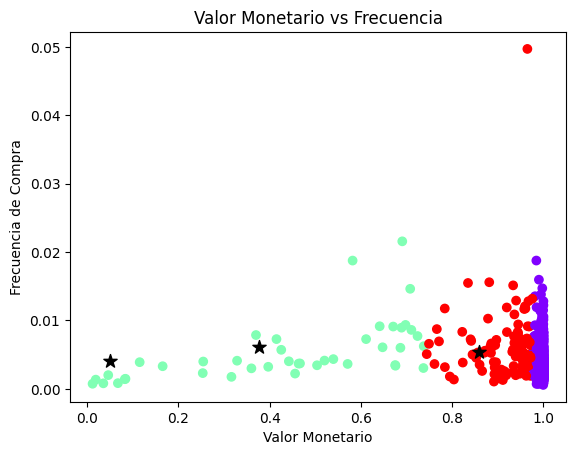

In [42]:
plt.scatter(data_norm["ValorM"],data_norm["Frecuencia"],c=y,cmap='rainbow')
plt.title('Valor Monetario vs Frecuencia')
plt.xlabel('Valor Monetario')
plt.ylabel('Frecuencia de Compra')
plt.scatter(C[:,0],C[:,1],marker='*', s=100, c='k')

for i, centroide in enumerate(C):
    print(f"Cluster {i}: Centroide ({centroide[0]:.2f}, {centroide[1]:.2f})")

Cluster 0: Centroide (0.05, 0.00)
Cluster 1: Centroide (0.86, 0.01)
Cluster 2: Centroide (0.38, 0.01)


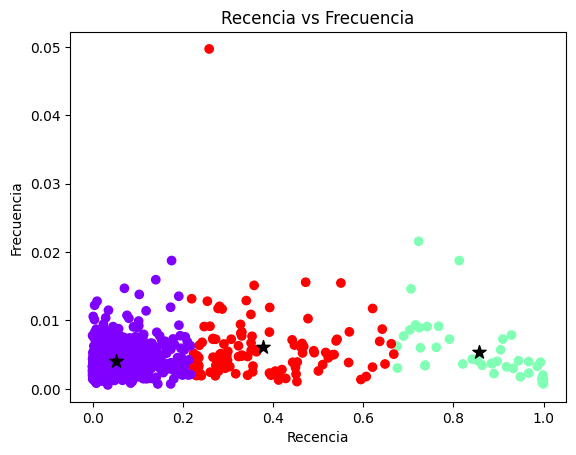

In [43]:
plt.scatter(data_norm["Recencia"],data_norm["Frecuencia"],c=y,cmap='rainbow')
plt.title('Recencia vs Frecuencia')
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')
plt.scatter(C[:,0],C[:,1],marker='*', s=100, c='k')

for i, centroide in enumerate(C):
    print(f"Cluster {i}: Centroide ({centroide[0]:.2f}, {centroide[1]:.2f})")


In [45]:
# Agregué una columna en un nuevo dataframe para identificar a qué cluster pertenece cada cliente
# El orden es el mismo por lo que no consideré realizar un join pero para asegurar la correcta asignación podríamos incluir el ID de cliente
rfm_df2_kmeans = rfm_puntos.copy()
rfm_df2_kmeans['Cluster'] = km.predict(data_norm)
rfm_df2_kmeans.tail(10)

,ID_Customer,Customer Name,Recencia,Frecuencia,ValorM,R,F,M,RFM_Puntos,Cluster
782,783,Patrick Cassidy,93,2,171.0,3,1,1,5,2
783,784,Elliot Owen,200,2,2359.0,2,1,2,5,0
784,785,Cora Konieczny,21,3,1466.0,4,1,2,7,0
785,786,Lydia Fowler,111,4,989.0,3,1,1,5,0
786,787,Yasmin Higgins,132,5,364.0,2,1,1,4,2
787,788,Bethany Powell,125,1,57.0,2,1,1,4,1
788,789,Alexandra Mahmood,118,1,47.0,3,1,1,5,1
789,790,Carol Leach,46,2,1763.0,3,1,2,6,0
790,791,Charles Rice,72,2,642.0,3,1,1,5,0
791,792,Jay Collier,2,1,516.0,4,1,1,6,0


In [46]:
cluster_conteo = rfm_df2_kmeans['ID_Customer'].groupby(rfm_df2_kmeans['Cluster']).count()
display(cluster_conteo)


Cluster
0    643
1     42
2    107
Name: ID_Customer, dtype: int64

## Aglomerativo

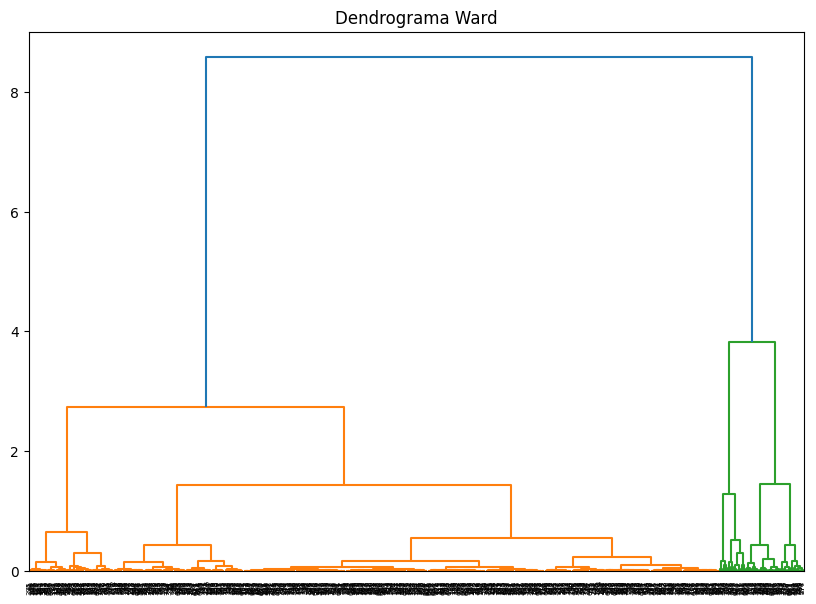

In [47]:
# ## Criterio de enlazamiento : WARD
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('Dendrograma Ward')
dend = sch.dendrogram(sch.linkage(data_norm,method='ward'))

In [48]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
cluster.fit_predict(data_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2,

Text(0, 0.5, 'Frecuencia')

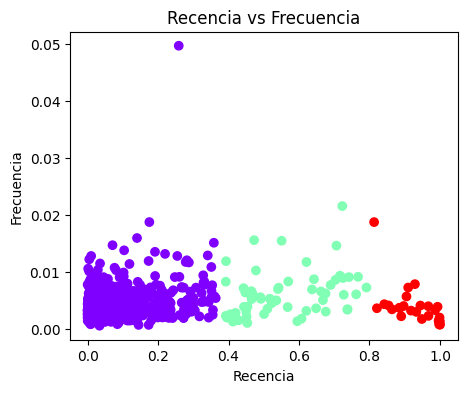

In [49]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.Recencia, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Recencia vs Frecuencia')
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia de Compra')

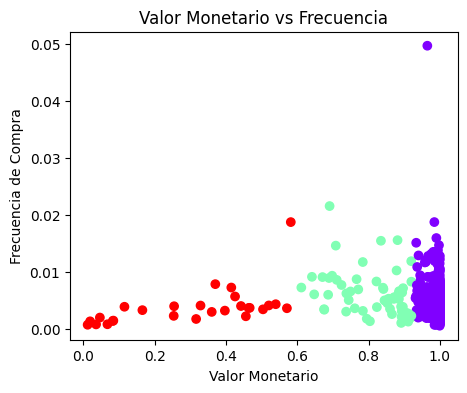

In [50]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.ValorM, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Valor Monetario vs Frecuencia')
plt.xlabel('Valor Monetario')
plt.ylabel('Frecuencia de Compra')

In [52]:
## Criterio de enlazamiento : SINGLE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,

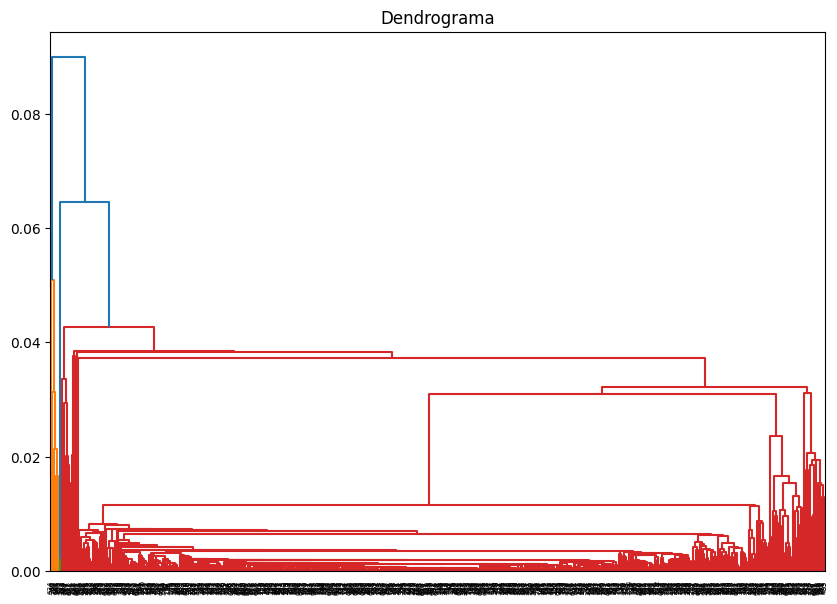

In [53]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('Dendrograma')
dend = sch.dendrogram(sch.linkage(data_norm,method='single'))

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')
cluster.fit_predict(data_norm)

Text(0, 0.5, 'Frecuencia')

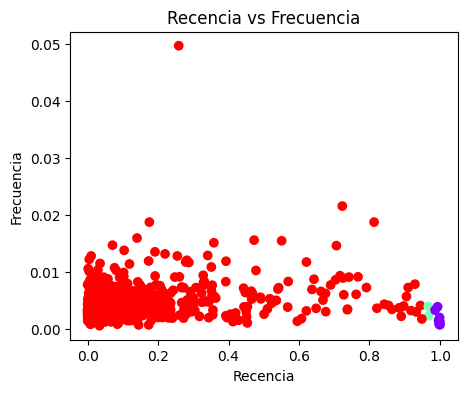

In [54]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.Recencia, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Recencia vs Frecuencia')
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia de Compra')

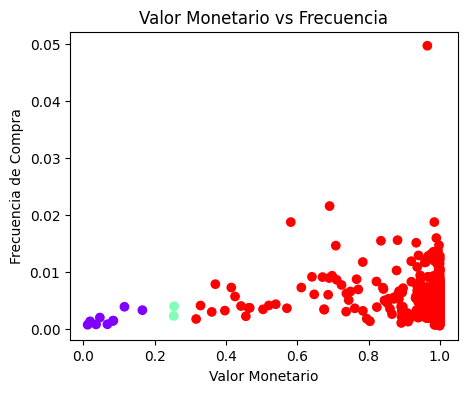

In [55]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.ValorM, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Valor Monetario vs Frecuencia')
plt.xlabel('Valor Monetario')
plt.ylabel('Frecuencia de Compra')

In [57]:
## Criterio de enlazamiento : COMPLETE

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 0,

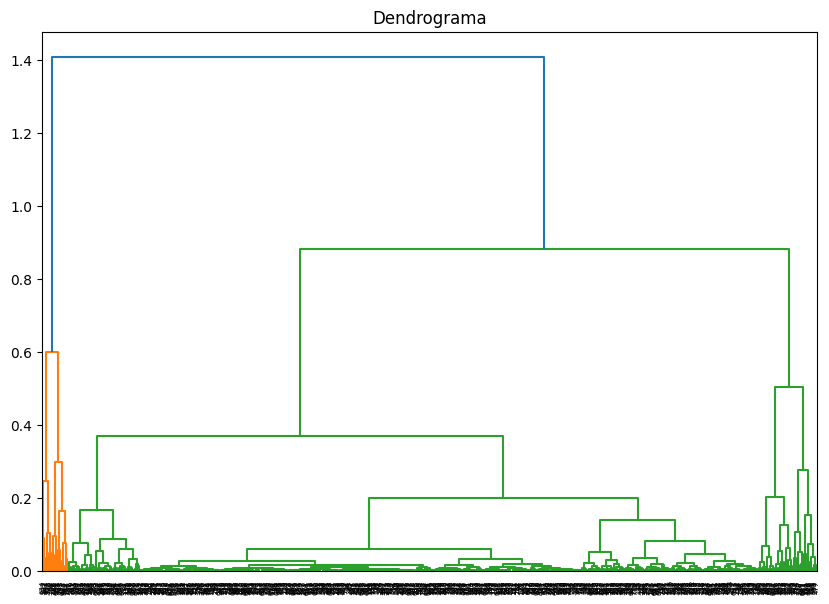

In [58]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('Dendrograma')
dend = sch.dendrogram(sch.linkage(data_norm,method='complete'))

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
cluster.fit_predict(data_norm)

Text(0, 0.5, 'Frecuencia')

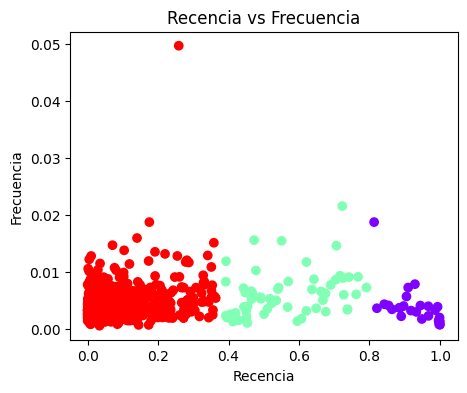

In [59]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.Recencia, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Recencia vs Frecuencia')
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia de Compra')

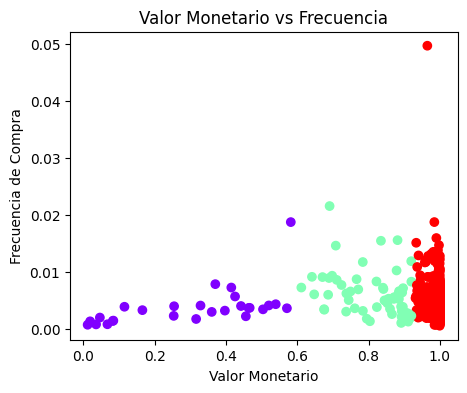

In [60]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.ValorM, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Valor Monetario vs Frecuencia')
plt.xlabel('Valor Monetario')
plt.ylabel('Frecuencia de Compra')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

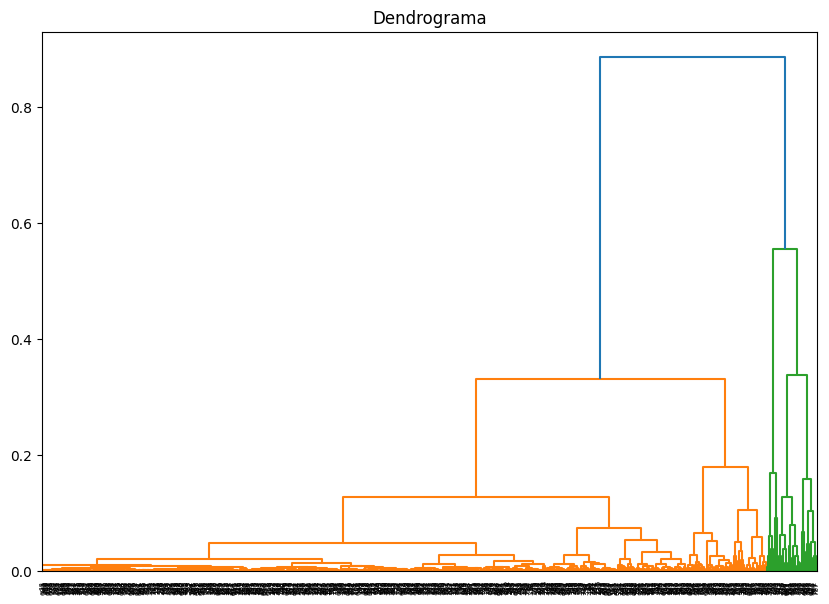

In [62]:
## Criterio de enlazamiento : AVERAGE
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
plt.title('Dendrograma')
dend = sch.dendrogram(sch.linkage(data_norm,method='average'))

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='average')
cluster.fit_predict(data_norm)

Text(0, 0.5, 'Frecuencia')

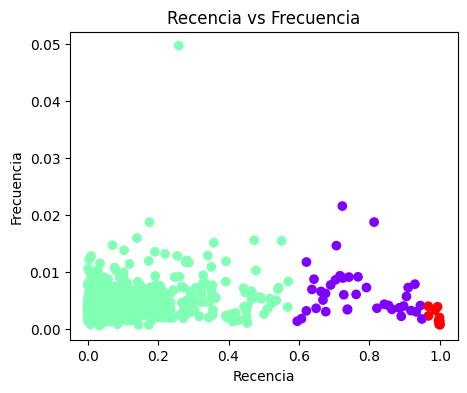

In [63]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.Recencia, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Recencia vs Frecuencia')
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia de Compra')

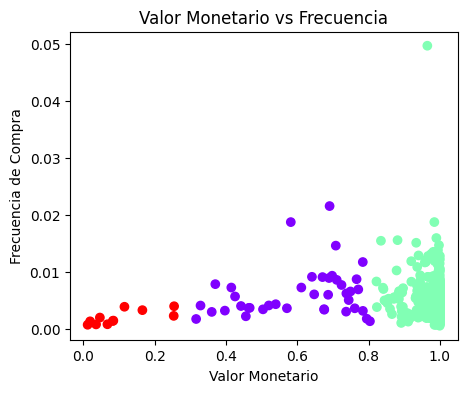

In [64]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.ValorM, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Valor Monetario vs Frecuencia')
plt.xlabel('Valor Monetario')
plt.ylabel('Frecuencia de Compra')

## Mezclas Gaussianas

In [66]:
# mezclas gaussianas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.mixture import GaussianMixture

GaussianMixture(n_components=3)

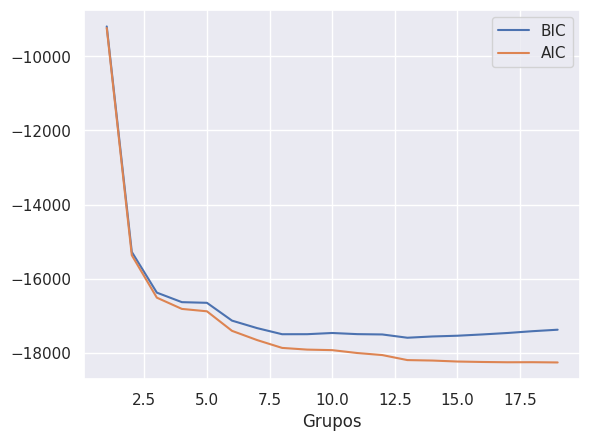

In [67]:
from pandas.core.common import random_state
n_clusters = np.arange(1,20)
models = [GaussianMixture(n, covariance_type='full',
                random_state=0).fit(data_norm) for n in n_clusters]
plt.plot(n_clusters,[m.bic(data_norm) for m in models], label='BIC')
plt.plot(n_clusters,[m.aic(data_norm) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('Grupos')
gmm = GaussianMixture(n_components=3)
gmm.fit(data_norm)

In [68]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data_norm)

GaussianMixture(n_components=3)

In [69]:
labels = gmm.predict(data_norm)

Text(0, 0.5, 'Frecuencia')

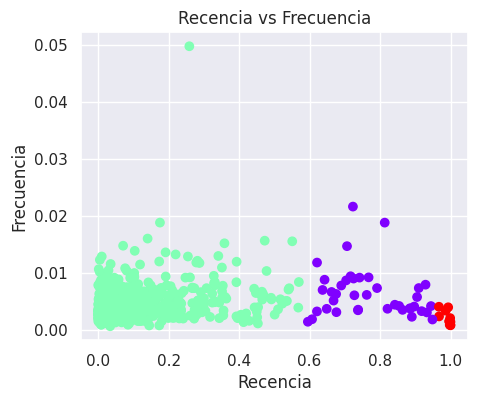

In [70]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.Recencia, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Recencia vs Frecuencia')
plt.xlabel('Recencia')
plt.ylabel('Frecuencia')

Text(0, 0.5, 'Frecuencia de Compra')

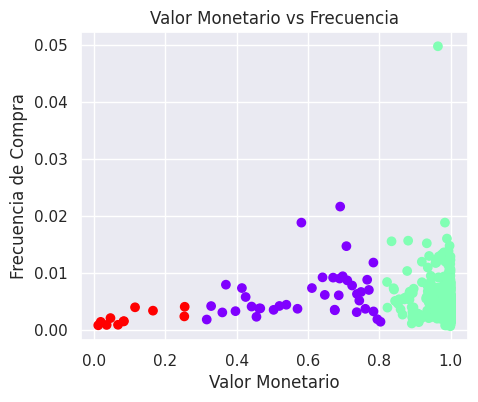

In [71]:
plt.figure(figsize=(5,4))
plt.scatter(data_norm.ValorM, data_norm.Frecuencia, c=cluster.labels_,cmap='rainbow')
plt.title('Valor Monetario vs Frecuencia')
plt.xlabel('Valor Monetario')
plt.ylabel('Frecuencia de Compra')

## Análisis de canasta

In [177]:
import plotly.express as px

df_agg = df_transacciones.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

conteo = df_transacciones.groupby(['Category', 'Sub-Category'])['Order ID'].nunique().reset_index(name='Transacciones')

df_agg = pd.merge(df_agg, conteo, on=['Category', 'Sub-Category'], how='left')


fig = px.treemap(
    df_agg,
    path=['Category', 'Sub-Category'],
    values='Sales',
    color='Transacciones',
    title='Ventas y transacciones por Categoria y Sub-Categoria',
    color_continuous_scale='ice',
    width=700,
    height=750

)

fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=50),
    font=dict(family='Times New Roman', size=12, color='black'),
)

fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [74]:
# Generación de word cloud para artículos más vendidos

In [124]:
!pip install wordcloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3099, in _parsed_pkg_info
    return self._pkg_info
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info. Did you mean: 'egg_info'?

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py",

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



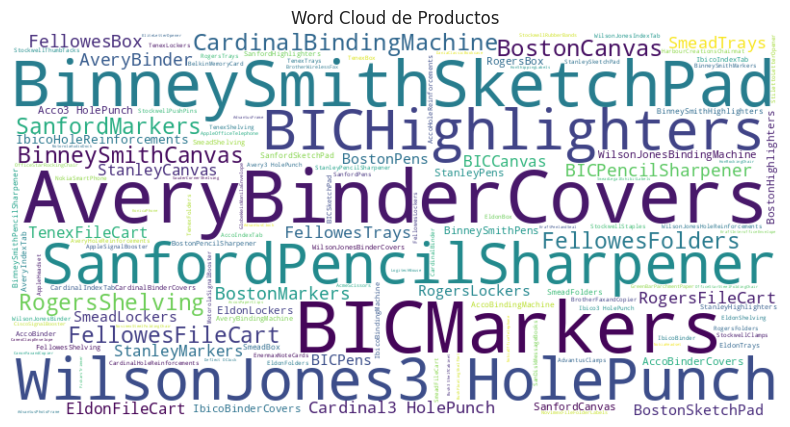

In [129]:
from wordcloud import WordCloud

df_transacciones['Product'] = df_transacciones['Product'].str.replace(" ", "")
df_transacciones['Product'] = df_transacciones['Product'].str.replace("&", "")

text = ' '.join(df_transacciones['Product'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Productos')
plt.show()


In [75]:
!pip install mlxtend
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [76]:
retail_data = df_transacciones.groupby(['Order ID'])['Sub-Category'].apply(list).to_frame().reset_index()
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      4117 non-null   object
 1   Sub-Category  4117 non-null   object
dtypes: object(2)
memory usage: 64.5+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
transacciones = retail_data['Sub-Category'].to_list()
len(transacciones)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


4117

In [78]:
# TransactionEncoder para obtener la matriz binaria
# onehot nos dice las subbcategorias que están presentes en cada una de las transacciones
encoder = TransactionEncoder().fit(transacciones)
onehot = encoder.transform(transacciones)
# onehot

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
# convertir el arreglo onehot a DF
onehot = pd.DataFrame(onehot,columns=encoder.columns_)
onehot.head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accessories,Appliances,Art,Binders,Bookcases,Chairs,Copiers,Envelopes,Fasteners,Furnishings,Labels,Machines,Paper,Phones,Storage,Supplies,Tables
0,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False


In [80]:
print(apriori(onehot,min_support=0.001,max_len=3,use_colnames=True))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


      support                       itemsets
0    0.084528                  (Accessories)
1    0.056109                   (Appliances)
2    0.243138                          (Art)
3    0.225164                      (Binders)
4    0.087685                    (Bookcases)
..        ...                            ...
443  0.001457  (Machines, Storage, Supplies)
444  0.002672       (Storage, Phones, Paper)
445  0.001214      (Supplies, Phones, Paper)
446  0.001700     (Supplies, Storage, Paper)
447  0.001457    (Supplies, Storage, Phones)

[448 rows x 2 columns]


In [81]:
# obtenemos el frequent itemset con ayuda del algoritmo apriori
freq_items = apriori(onehot,min_support=0.001,max_len=3,use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
freq_items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.084528,(Accessories)
1,0.056109,(Appliances)
2,0.243138,(Art)
3,0.225164,(Binders)
4,0.087685,(Bookcases)
...,...,...
443,0.001457,"(Machines, Storage, Supplies)"
444,0.002672,"(Storage, Phones, Paper)"
445,0.001214,"(Supplies, Phones, Paper)"
446,0.001700,"(Supplies, Storage, Paper)"


In [83]:
# Generar las reglas de asociación
rules_class = association_rules(freq_items,metric='lift',min_threshold=0.001)
rules_class

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Appliances),(Accessories),0.056109,0.084528,0.004615,0.082251,0.973068,-0.000128,0.997519,-0.028487
1,(Accessories),(Appliances),0.084528,0.056109,0.004615,0.054598,0.973068,-0.000128,0.998402,-0.029346
2,(Art),(Accessories),0.243138,0.084528,0.024532,0.100899,1.193683,0.003981,1.018209,0.214381
3,(Accessories),(Art),0.084528,0.243138,0.024532,0.290230,1.193683,0.003981,1.066348,0.177238
4,(Binders),(Accessories),0.225164,0.084528,0.020403,0.090615,1.072016,0.001371,1.006694,0.086700
...,...,...,...,...,...,...,...,...,...,...
2049,"(Supplies, Phones)",(Storage),0.007044,0.229536,0.001457,0.206897,0.901368,-0.000159,0.971455,-0.099262
2050,"(Storage, Phones)",(Supplies),0.022346,0.081613,0.001457,0.065217,0.799107,-0.000366,0.982461,-0.204545
2051,(Supplies),"(Storage, Phones)",0.081613,0.022346,0.001457,0.017857,0.799107,-0.000366,0.995429,-0.214909
2052,(Storage),"(Supplies, Phones)",0.229536,0.007044,0.001457,0.006349,0.901368,-0.000159,0.999301,-0.124362


In [84]:
# Reglas con al menos dos elementos en el antecedente
# Ordenadas de acuerdo a lift de manera descendente
rules_class['lhs_items']=rules_class.antecedents.apply(lambda x: len(x))
rules_class[rules_class['lhs_items']>1].sort_values('lift',ascending=False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
1874,"(Machines, Fasteners)",(Labels),0.006072,0.086471,0.002186,0.360000,4.163258,0.001661,1.427389,0.764446,2
1876,"(Fasteners, Labels)",(Machines),0.006801,0.078941,0.002186,0.321429,4.071758,0.001649,1.357350,0.759572,2
1828,"(Labels, Envelopes)",(Furnishings),0.004858,0.090357,0.001700,0.350000,3.873522,0.001261,1.399451,0.745458,2
1557,"(Machines, Envelopes)",(Bookcases),0.003886,0.087685,0.001214,0.312500,3.563885,0.000874,1.327003,0.722214,2
1875,"(Machines, Labels)",(Fasteners),0.007530,0.082584,0.002186,0.290323,3.515465,0.001564,1.292722,0.720971,2


In [85]:
# Generar un heatmap de nuestro análisis
# Agregar columnas concatenando los nombre de las subcategorias
rules_class['antecedents_'] = rules_class.antecedents.apply(lambda a: ','.join(list(a)))
rules_class['consequents_'] = rules_class.consequents.apply(lambda a: ','.join(list(a)))
# Convertir el DF en una matriz utilizando
pivot = rules_class[rules_class.lhs_items>1].pivot(index='antecedents_',
                                       columns = 'consequents_',
                                       values = 'confidence')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


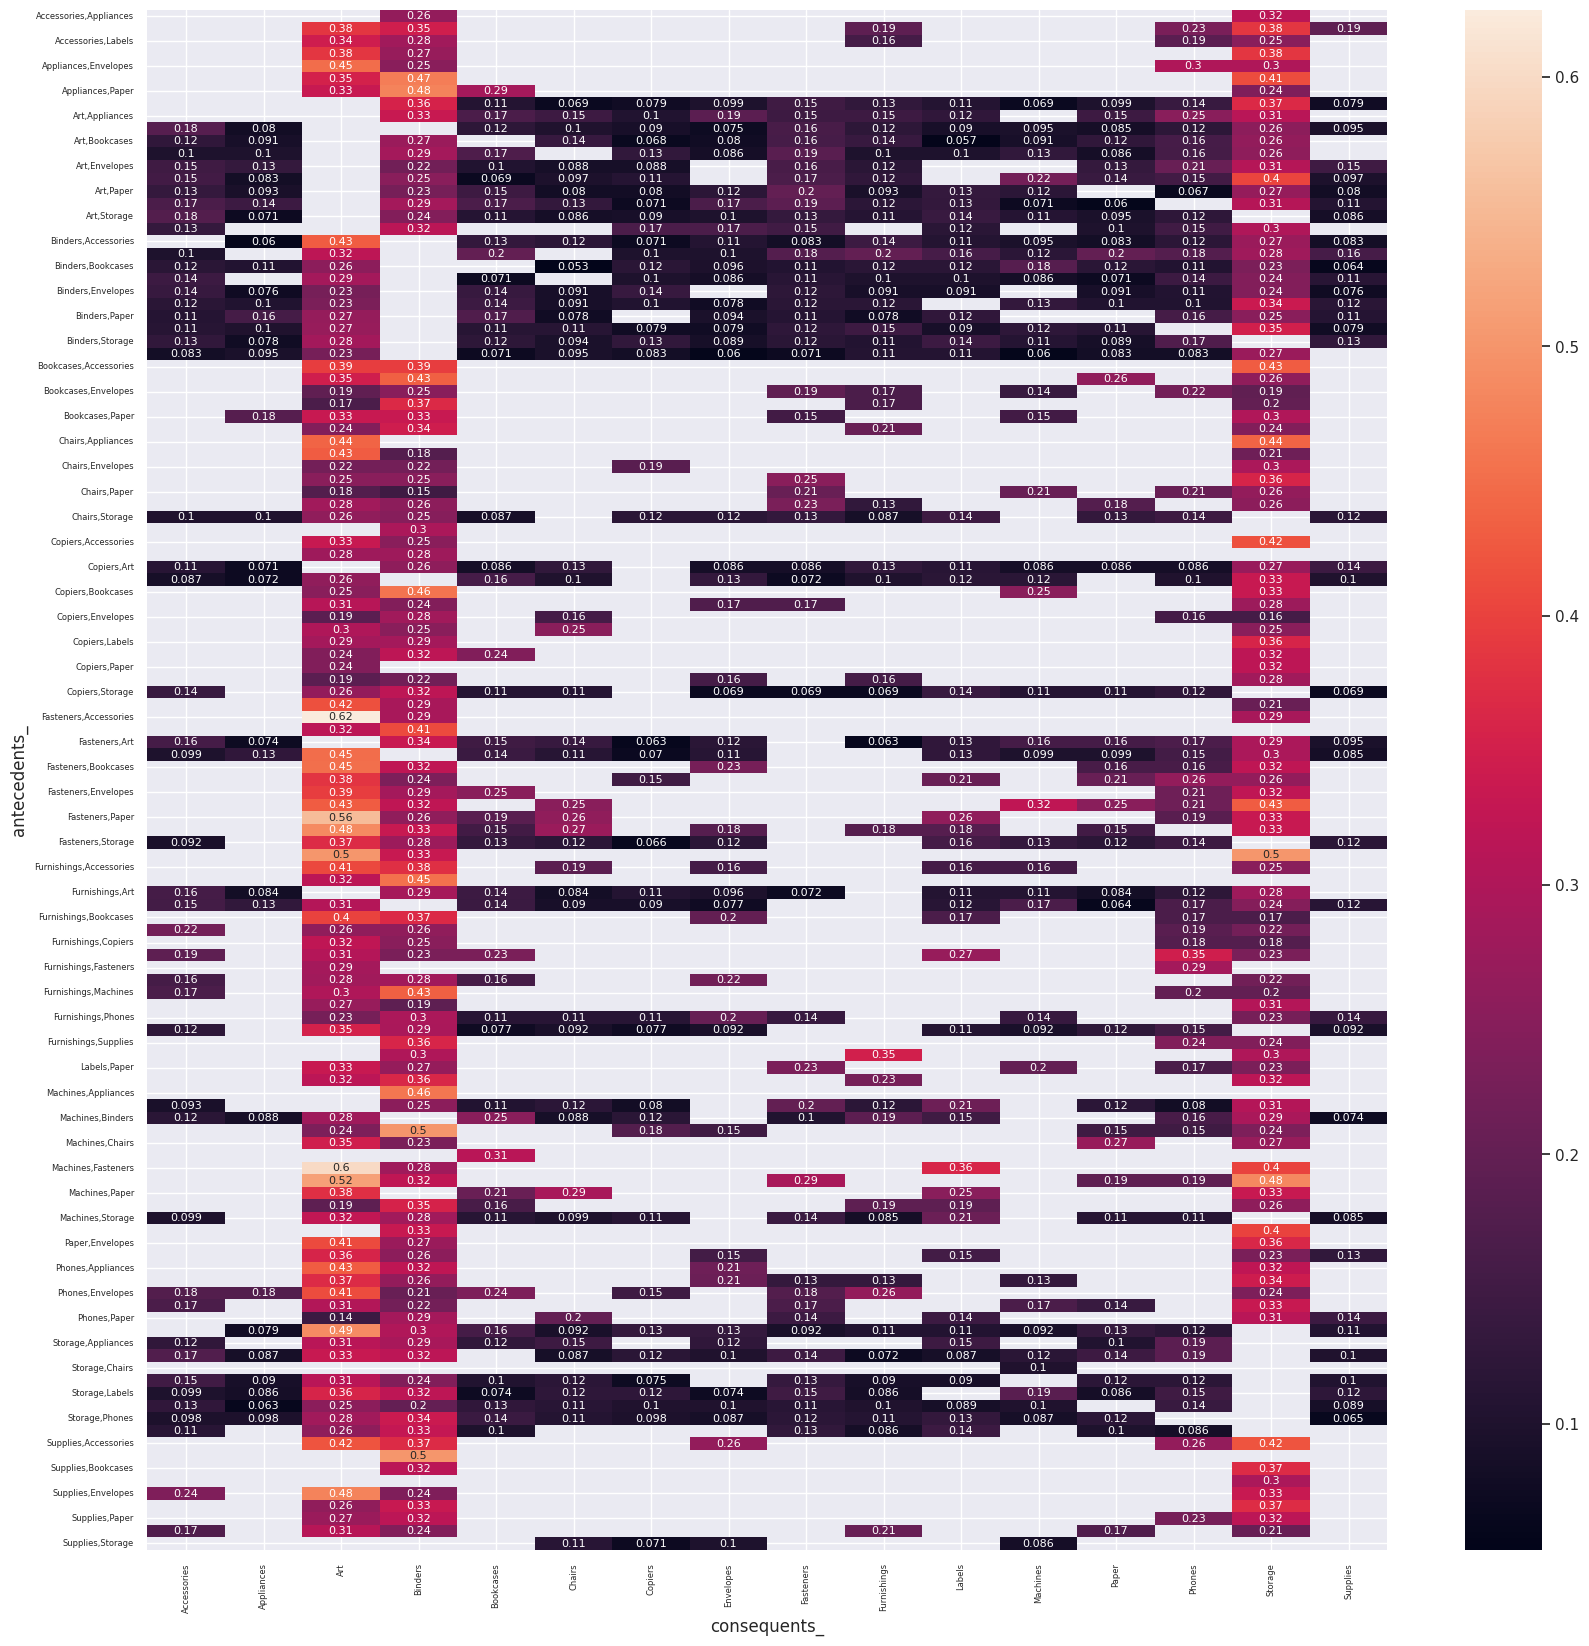

In [86]:
plt.figure(figsize=(20, 20))
sns.heatmap(pivot,annot=True, annot_kws={'fontsize': 8})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=6)
plt.tick_params(axis='y', labelsize=6)
plt.show()

In [94]:
# A nivel producto
retail_data = df_transacciones.groupby(['Order ID'])['Product'].apply(list).to_frame().reset_index()
retail_data.info()

transacciones = retail_data['Product'].to_list()

encoder = TransactionEncoder().fit(transacciones)
onehot = encoder.transform(transacciones)
onehot = pd.DataFrame(onehot,columns=encoder.columns_)

freq_items = apriori(onehot,min_support=0.0004,max_len=3,use_colnames=True)
freq_items


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order ID  4117 non-null   object
 1   Product   4117 non-null   object
dtypes: object(2)
memory usage: 64.5+ KB


,support,itemsets
0,0.008987,(Acco 3-Hole Punch)
1,0.008016,(Acco Binder)
2,0.009230,(Acco Binder Covers)
3,0.008501,(Acco Binding Machine)
4,0.007773,(Acco Hole Reinforcements)
...,...,...
892,0.000486,"(Wilson Jones Binding Machine, Stockwell Staples)"
893,0.000486,"(Tenex Lockers, Wilson Jones Hole Reinforcements)"
894,0.000486,"(Ibico 3-Hole Punch, Avery Binding Machine, El..."
895,0.000486,"(Safco Floating Shelf Set, Binney & Smith Penc..."


In [95]:
# Generar las reglas de asociación
rules_class = association_rules(freq_items,metric='lift',min_threshold=0.0004)
rules_class

# Reglas con al menos dos elementos en el antecedente
# Ordenadas de acuerdo a lift de manera descendente
rules_class['lhs_items']=rules_class.antecedents.apply(lambda x: len(x))
rules_class[rules_class['lhs_items']>1].sort_values('lift',ascending=False).head(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,lhs_items
804,"(Binney & Smith Pencil Sharpener, Cardinal 3-H...",(Safco Floating Shelf Set),0.000486,0.003643,0.000486,1.000000,274.466667,0.000484,inf,0.996841,2
808,"(Sanford Markers, Ibico Binder Covers)",(Deflect-O Door Stop),0.000729,0.003643,0.000486,0.666667,182.977778,0.000483,2.98907,0.995260,2
798,"(Eldon File Cart, Avery Binding Machine)",(Ibico 3-Hole Punch),0.000486,0.007773,0.000486,1.000000,128.656250,0.000482,inf,0.992710,2
797,"(Ibico 3-Hole Punch, Eldon File Cart)",(Avery Binding Machine),0.000486,0.008501,0.000486,1.000000,117.628571,0.000482,inf,0.991981,2
809,"(Sanford Markers, Deflect-O Door Stop)",(Ibico Binder Covers),0.000486,0.009230,0.000486,1.000000,108.342105,0.000481,inf,0.991252,2


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


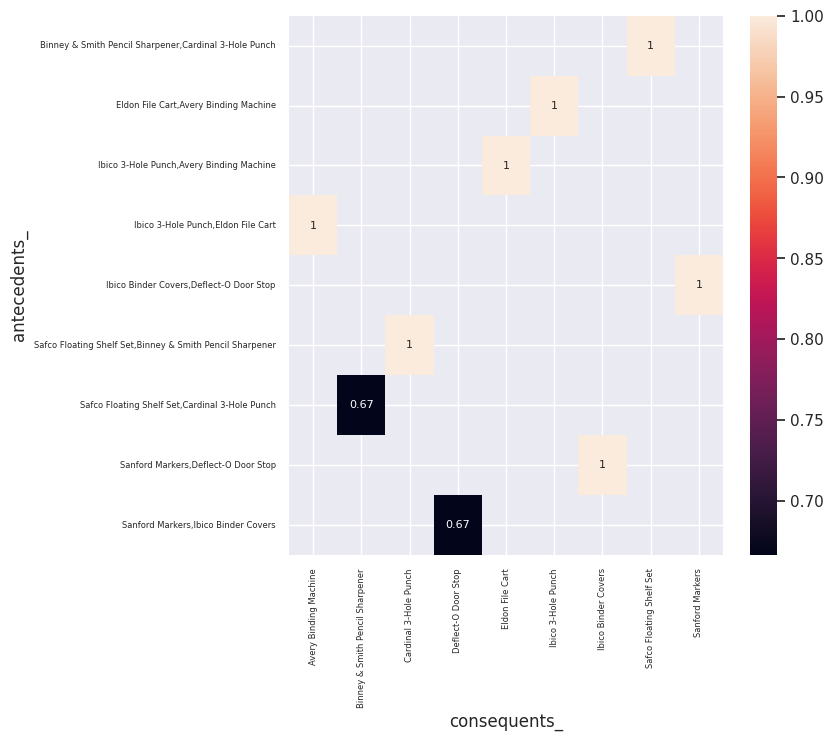

In [96]:
# Generar un heatmap de nuestro análisis
import seaborn as sns
# Agregamos columnas concatenando los nombre de los productos
rules_class['antecedents_'] = rules_class.antecedents.apply(lambda a: ','.join(list(a)))
rules_class['consequents_'] = rules_class.consequents.apply(lambda a: ','.join(list(a)))
# Convertir el DF en una matriz utilizando
pivot = rules_class[rules_class.lhs_items>1].pivot(index='antecedents_',
                                       columns = 'consequents_',
                                       values = 'confidence')

plt.figure(figsize=(7, 7))
sns.heatmap(pivot,annot=True, annot_kws={'fontsize': 8})
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=6)
plt.tick_params(axis='y', labelsize=6)
plt.show()